In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis

# Load the dataset
file_path = 'Customers.csv'
data_customers = pd.read_csv(file_path)



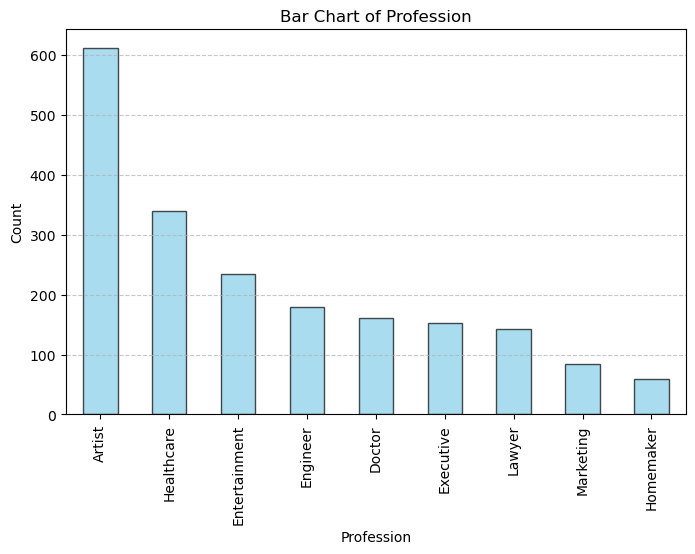

In [4]:
# Plot 1: Bar Chart for Profession Count
def plot_bar_chart(data, column):
    """
    Creates a bar chart for the count of categories in the specified column.

    Parameters:
        data (DataFrame): The dataset containing the data.
        column (str): The column to visualize.

    Returns:
        None
    """
    plt.figure(figsize=(8, 5))
    data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
    plt.title(f"Bar Chart of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
plot_bar_chart(data_customers, 'Profession')

In [13]:
# Basic statistical description
basic_stats = data_customers.describe()

# Additional statistical moments: skewness and kurtosis
skewness = data_customers.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x, nan_policy='omit'))
kurt = data_customers.select_dtypes(include=['float64', 'int64']).apply(lambda x: kurtosis(x, nan_policy='omit'))

# Correlation matrix for numerical columns
correlation_matrix = data_customers.select_dtypes(include=['float64', 'int64']).corr()

# Combine results into a summary DataFrame
statistical_summary = {
    'Mean': data_customers.mean(numeric_only=True),
    'Median': data_customers.median(numeric_only=True),
    'Std Dev': data_customers.std(numeric_only=True),
    'Skewness': skewness,
    'Kurtosis': kurt
}

stat_summary_df = pd.DataFrame(statistical_summary)

# Display results
print("Basic Statistical Description:")
print(basic_stats)

print("\nStatistical Summary (Mean, Median, Std Dev, Skewness, Kurtosis):")
print(stat_summary_df)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Basic Statistical Description:
        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  


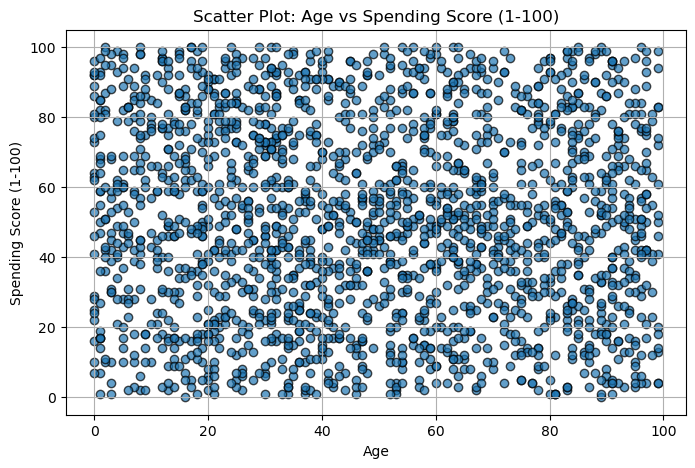

In [5]:
# Plot 2: Scatter Plot for Age vs Spending Score
def plot_scatter(data, x_col, y_col):
    """
    Creates a scatter plot between two columns in the dataset.

    Parameters:
        data (DataFrame): The dataset containing the data.
        x_col (str): The column for the x-axis.
        y_col (str): The column for the y-axis.

    Returns:
        None
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(data[x_col], data[y_col], alpha=0.7, edgecolor='k')
    plt.title(f"Scatter Plot: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()
plot_scatter(data_customers, 'Age', 'Spending Score (1-100)')

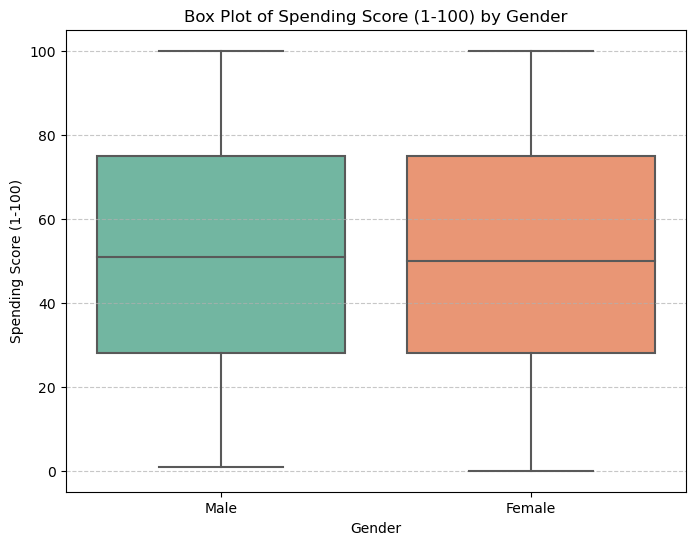

In [6]:
# Plot 3: Box Plot for Spending Score by Gender
def plot_boxplot(data, x_col, y_col):
    """
    Creates a box plot to visualize the distribution of a dependent variable grouped by a categorical column.

    Parameters:
        data (DataFrame): The dataset containing the data.
        x_col (str): The column for the x-axis (categorical variable).
        y_col (str): The column for the y-axis (numerical variable).

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[x_col], y=data[y_col], palette="Set2")
    plt.title(f"Box Plot of {y_col} by {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
plot_boxplot(data_customers, 'Gender', 'Spending Score (1-100)')

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

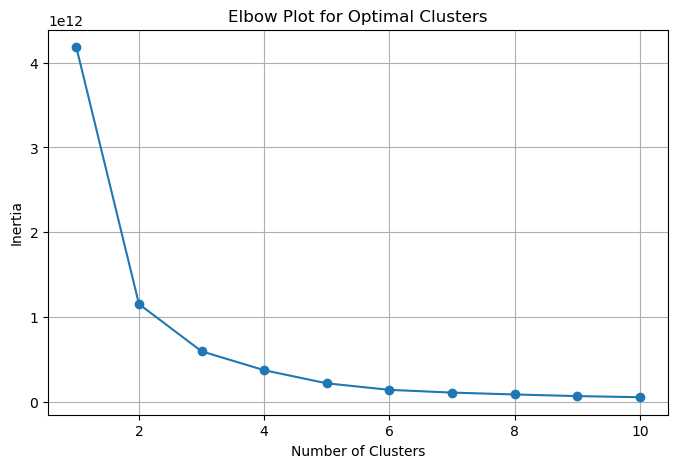

In [7]:
# Plot 4: Elbow Plot for Optimal Clusters
def plot_elbow(data, max_clusters=10):
    """
    Creates an elbow plot to determine the optimal number of clusters using k-means.

    Parameters:
        data (DataFrame): The dataset containing the data.
        max_clusters (int): Maximum number of clusters to consider.

    Returns:
        None
    """
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.title("Elbow Plot for Optimal Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
plot_elbow(data_customers[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]) 

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


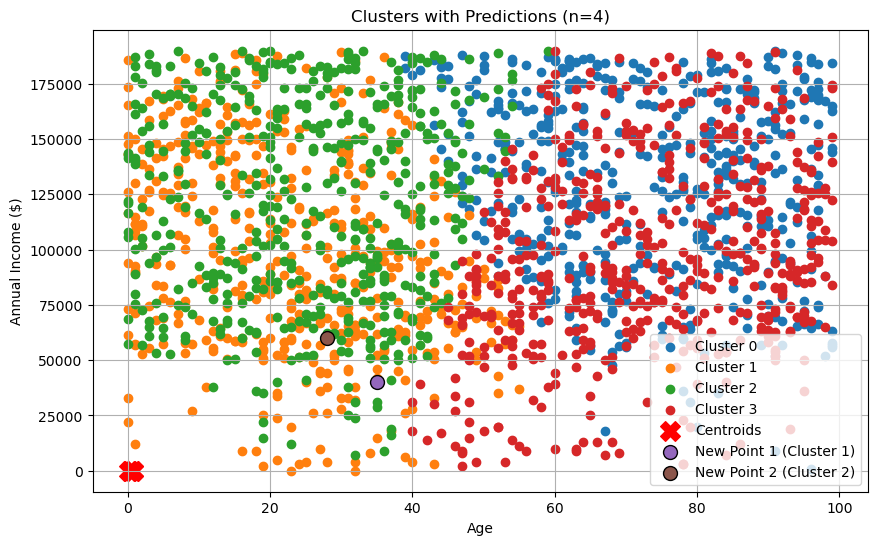

Silhouette Score for 4 clusters: 0.27
Predicted clusters for new points: [1 2]


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function for clustering with normalization, back-scaling, and predictions
def perform_clustering_with_predictions(data, n_clusters, new_points):
    """
    Performs k-means clustering on normalized data and predicts clusters for new data points.

    Parameters:
        data (DataFrame): The dataset containing the data.
        n_clusters (int): Number of clusters.
        new_points (array-like): New data points for prediction.

    Returns:
        DataFrame: Data with cluster labels.
        array: Predicted cluster labels for new points.
    """
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(normalized_data)
    
    # Back-scale data for presentation
    clustered_data = pd.DataFrame(scaler.inverse_transform(normalized_data), columns=data.columns)
    clustered_data['Cluster'] = labels
    
    # Predict clusters for new data points
    normalized_new_points = scaler.transform(new_points)
    predicted_labels = kmeans.predict(normalized_new_points)
    back_scaled_points = scaler.inverse_transform(normalized_new_points)
    
    # Plot the clusters and predictions
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_points = clustered_data[clustered_data['Cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f"Cluster {cluster}")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Plot new points with predictions
    for i, point in enumerate(back_scaled_points):
        plt.scatter(point[0], point[1], label=f"New Point {i+1} (Cluster {predicted_labels[i]})", edgecolor='k', s=100)
    
    plt.title(f"Clusters with Predictions (n={n_clusters})")
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display silhouette score
    silhouette_avg = silhouette_score(normalized_data, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")
    
    return clustered_data, predicted_labels

# Example new points for predictions
new_points_clustering = np.array([[35, 40000, 50], [28, 60000, 30]])

# Perform clustering with predictions
clustered_data, predicted_clusters = perform_clustering_with_predictions(
    data_customers[['Age', 'Annual Income ($)', 'Spending Score (1-100)']], 
    n_clusters=4, 
    new_points=new_points_clustering
)

print("Predicted clusters for new points:", predicted_clusters)



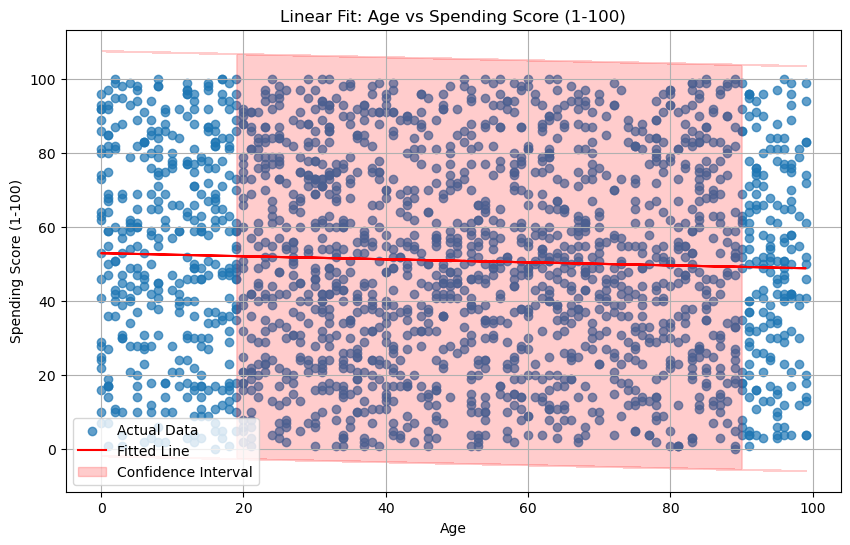

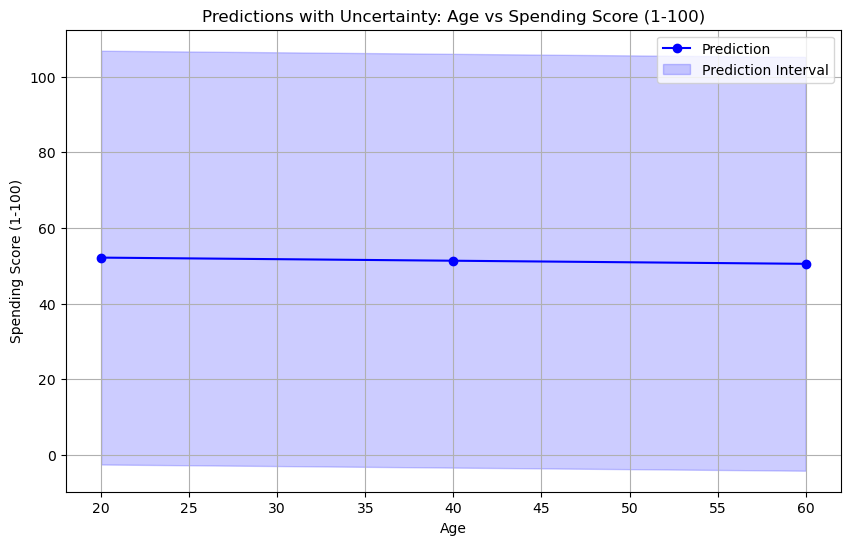

Fitting predictions for new points:
   New Points  Predicted  Lower CI    Upper CI
0          20  52.151896 -2.538512  106.842304
1          40  51.330490 -3.359918  106.020898
2          60  50.509084 -4.181324  105.199492


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Function for fitting with predictions, confidence intervals, and error bars
def perform_fitting_with_predictions(data, x_col, y_col, new_points):
    """
    Fits a linear regression model, generates predictions for new data points,
    and plots results with confidence intervals and error bars.

    Parameters:
        data (DataFrame): The dataset containing the data.
        x_col (str): The column for the independent variable (x-axis).
        y_col (str): The column for the dependent variable (y-axis).
        new_points (array-like): New data points for prediction.

    Returns:
        DataFrame: New points with predicted values and confidence intervals.
    """
    x = data[[x_col]].values
    y = data[y_col].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # Generate confidence intervals
    residuals = y - y_pred
    std_error = np.std(residuals)
    conf_interval = 1.96 * std_error  # 95% confidence interval

    # Plot data, fitted line, and error bars
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Actual Data', alpha=0.7)
    plt.plot(x, y_pred, color='red', label='Fitted Line')
    plt.fill_between(x.flatten(), (y_pred - conf_interval), (y_pred + conf_interval), color='red', alpha=0.2, label='Confidence Interval')
    plt.title(f"Linear Fit: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predictions for new points
    new_y_pred = model.predict(new_points)
    new_y_upper = new_y_pred + conf_interval
    new_y_lower = new_y_pred - conf_interval

    # Plot predictions with uncertainties
    plt.figure(figsize=(10, 6))
    plt.plot(new_points, new_y_pred, label='Prediction', color='blue', marker='o')
    plt.fill_between(new_points.flatten(), new_y_lower, new_y_upper, color='blue', alpha=0.2, label='Prediction Interval')
    plt.title(f"Predictions with Uncertainty: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return results as DataFrame
    return pd.DataFrame({'New Points': new_points.flatten(), 'Predicted': new_y_pred, 'Lower CI': new_y_lower, 'Upper CI': new_y_upper})

# Example new points for fitting predictions
new_points_fitting = np.array([[20], [40], [60]])

# Perform fitting with predictions
fitting_results = perform_fitting_with_predictions(
    data_customers, x_col='Age', y_col='Spending Score (1-100)', new_points=new_points_fitting
)

print("Fitting predictions for new points:")
print(fitting_results)
